<a href="https://colab.research.google.com/github/shreshthsk/MLProjects/blob/main/Cars_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
from PIL import Image
import requests
import cv2
import numpy as np

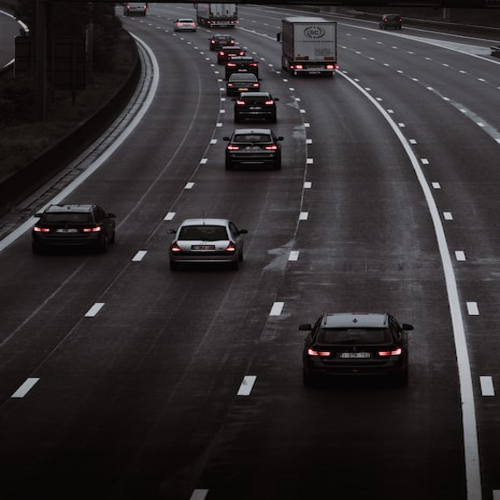

In [ ]:
image = Image.open(requests.get("https://images.unsplash.com/photo-1605602560252-2d23ec73d48a?ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D&auto=format&fit=crop&w=465&q=80",stream = True).raw)
image = image.resize((500,500))
image_arr = np.array(image)
image

Transformations

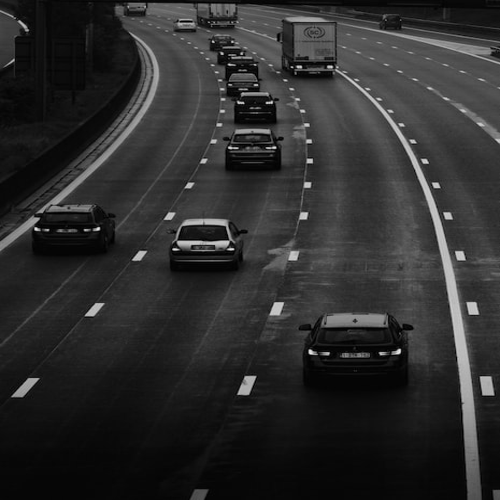

In [ ]:
#GreyScale
gray = cv2.cvtColor(image_arr,cv2.COLOR_BGR2GRAY)
Image.fromarray(gray)

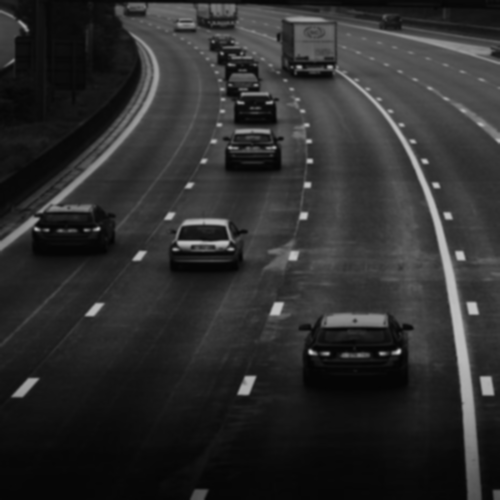

In [ ]:
#Gaussian Blur
blur = cv2.GaussianBlur(gray,(5,5),0)
Image.fromarray(blur)

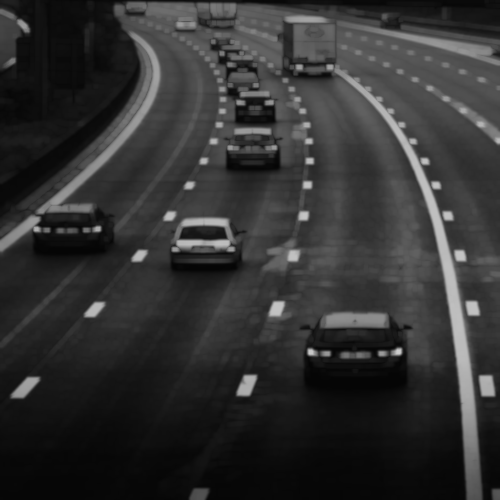

In [ ]:
#Dilation
dilated = cv2.dilate(blur,np.ones((3,3)))
Image.fromarray(dilated)

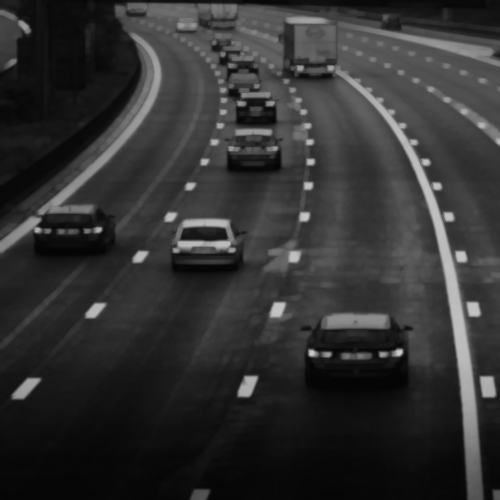

In [ ]:
#Morphological Transformation
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2))
closing = cv2.morphologyEx(dilated,cv2.MORPH_CLOSE,kernel)
Image.fromarray(closing)

In [ ]:
#Car Cascade to detect cars
car_cascade_src = 'cars.xml'
car_cascade = cv2.CascadeClassifier(car_cascade_src)
cars = car_cascade.detectMultiScale(closing,1.1,1)

6  cars found


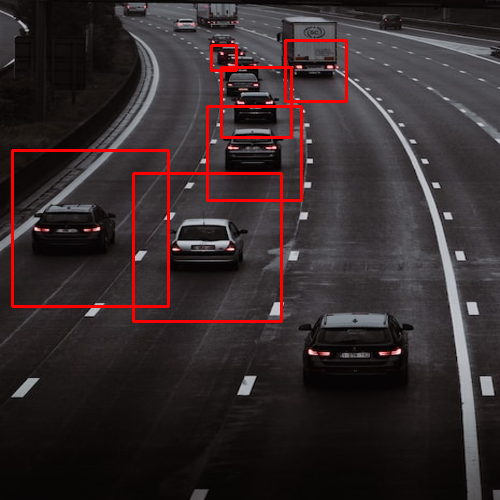

In [ ]:
#Rectangles around detected cars
cnt = 0
for (x,y,w,h) in cars:
  cv2.rectangle(image_arr,(x,y),(x+w,y+h),(255,0,0),2)
  cnt+=1
print(cnt," cars found")
Image.fromarray(image_arr)

In [ ]:
#Cars count from video
cascade_src = "cars.xml"
video = 'Cars.mp4'
cap = cv2.VideoCapture(video)
car_cascade = cv2.CascadeClassifier(cascade_src)
video = cv2.VideoWriter('result.avi',cv2.VideoWriter_fourcc(*'DIVX'),15,(450,250))

In [ ]:
while True:
  ret, img = cap.read()
  if(type(img)==type(None)):
    break
  gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  cars = car_cascade.detectMultiScale(gray,1.1,2)
  for (x,y,w,h) in cars:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)

  video.write(img)
video.release()